In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_spark_eventlog(df_jobs, df_stages):
    sns.set(style="whitegrid")

    # Intelligent mapping using modulo
    def map_job_type(job_id):
        job_type_mapping = {
            0: "Planning",           # Job 1
            1: "Kafka Fetch",         # Job 2
            2: "Transformations",     # Job 3
            3: "Sink Write"           # Job 4
        }
        return job_type_mapping.get(job_id % 4, "Unknown Job")

    # Apply mapping
    df_jobs['JobType'] = df_jobs['JobID'].apply(map_job_type)

    # If df_stages also has JobID (if not, we would need to fix differently)
    if 'JobID' in df_stages.columns:
        df_stages['JobType'] = df_stages['JobID'].apply(map_job_type)
    else:
        df_stages['JobType'] = "Unknown Job"

    # --- Plot 1: Stage Duration vs Stage ID (colored by JobType) ---
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='StageID', y='DurationSec', hue='JobType', palette='tab10', data=df_stages, legend='full')
    plt.title('Stage Duration vs Stage ID (Colored by Job Type)')
    plt.xlabel('Stage ID')
    plt.ylabel('Duration (seconds)')
    plt.axhline(df_stages['DurationSec'].mean(), color='red', linestyle='--', label='Mean Duration')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

    # --- Plot 2: Job Duration vs Job ID (colored by JobType) ---
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='JobID', y='DurationSec', hue='JobType', palette='tab10', data=df_jobs, legend='full')
    plt.title('Job Duration vs Job ID (Colored by Job Type)')
    plt.xlabel('Job ID')
    plt.ylabel('Duration (seconds)')
    plt.axhline(df_jobs['DurationSec'].mean(), color='red', linestyle='--', label='Mean Duration')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

    # --- Plot 3: Stage Duration vs Number of Tasks (colored by JobType) ---
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='NumTasks', y='DurationSec', hue='JobType', palette='tab10', data=df_stages, legend='full')
    plt.title('Stage Duration vs Number of Tasks (Colored by Job Type)')
    plt.xlabel('Number of Tasks')
    plt.ylabel('Duration (seconds)')
    plt.axhline(df_stages['DurationSec'].mean(), color='red', linestyle='--', label='Mean Duration')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()


In [7]:
df_stages = pd.read_parquet("../../data/raw/second_experiment/df_stages.parquet")

In [8]:
df_stages

,StageID,StageAttemptID,StageName,SubmissionTime,CompletionTime,NumTasks,ShuffleReadBytes,ShuffleWriteBytes,InputRecords,OutputRecords,GC Time (ms),Duration (ms),DurationSec
0,0,0,$anonfun$submit$1 at <unknown>:0,1745773722855,1745773729415,1,0,0,2596,0,99,3512,6.560
1,1,0,$anonfun$recordDeltaOperationInternal$1 at Dat...,1745773723545,1745773730628,11,0,0,2739,0,187,3945,7.083
2,2,0,start at <unknown>:0,1745773743251,1745773746633,11,0,0,2739,0,60,1954,3.382
3,3,0,start at <unknown>:0,1745773746676,1745773754616,50,0,0,0,0,232,134,7.940
4,4,0,start at <unknown>:0,1745773754617,1745773754839,1,0,0,0,0,0,0,0.222
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,1588,0,start at <unknown>:0,1745775302936,1745775304641,13,0,0,40,40,0,2069,1.705
1566,1589,0,start at <unknown>:0,1745775304868,1745775304988,9,0,0,5646,0,0,33,0.120
1567,1590,0,start at <unknown>:0,1745775305668,1745775305771,9,0,0,5646,0,0,35,0.103
1568,1591,0,start at <unknown>:0,1745775306143,1745775306366,9,0,0,5646,0,0,83,0.223


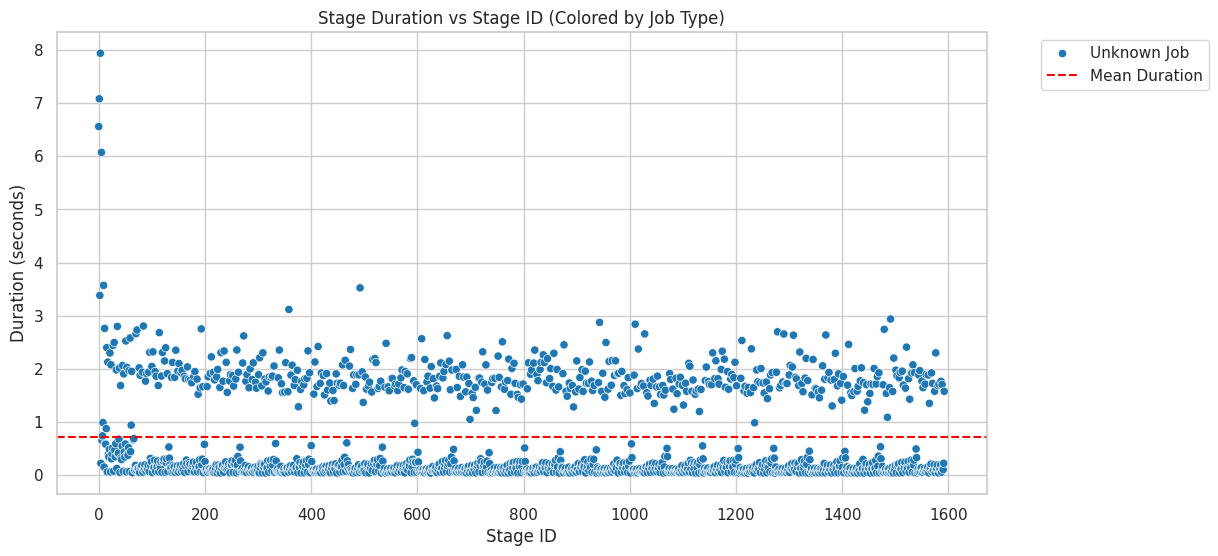

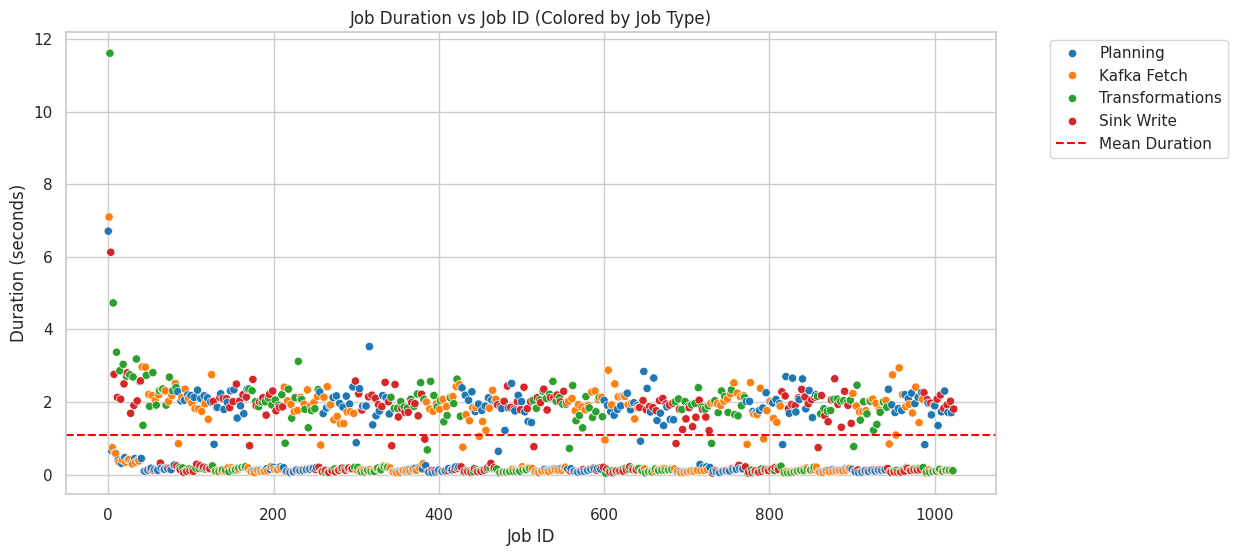

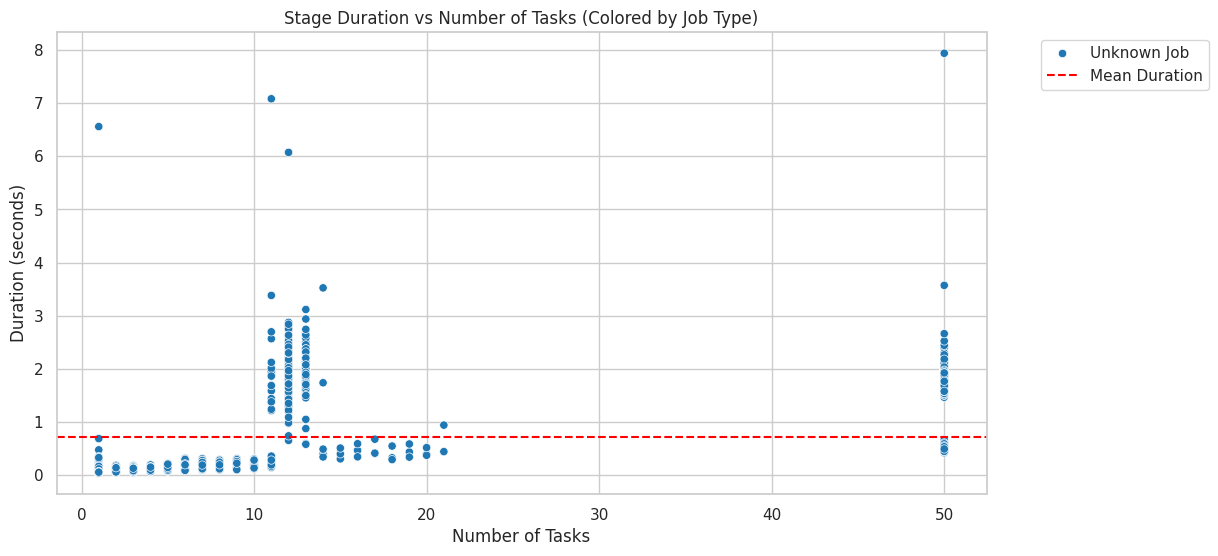

In [6]:
import pandas as pd

plot_spark_eventlog(pd.read_parquet("../../data/raw/second_experiment/df_jobs.parquet"), pd.read_parquet("../../data/raw/second_experiment/df_stages.parquet"))

In [3]:
def plot_bonus_spark_eventlog(df_jobs, df_stages):
    sns.set(style="whitegrid")

    # Heatmap of Job Durations over Time
    plt.figure(figsize=(14, 6))
    if 'SubmissionTime' in df_jobs.columns:
        df_jobs['SubmissionTime_dt'] = pd.to_datetime(df_jobs['SubmissionTime'], unit='ms')
        df_jobs_sorted = df_jobs.sort_values(by='SubmissionTime_dt')
        plt.plot(df_jobs_sorted['SubmissionTime_dt'], df_jobs_sorted['DurationSec'], marker='o', linestyle='-')
        plt.title('Job Duration Over Submission Time')
        plt.xlabel('Submission Time')
        plt.ylabel('Duration (seconds)')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

    # KDE Plot (Density) of Stage Durations
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df_stages['DurationSec'], shade=True, color='purple')
    plt.title('Density Plot of Stage Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

    # Bonus: Histogram of Stage Durations
    plt.figure(figsize=(12, 6))
    sns.histplot(df_stages['DurationSec'], bins=50, kde=False, color='orange')
    plt.title('Histogram of Stage Durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()



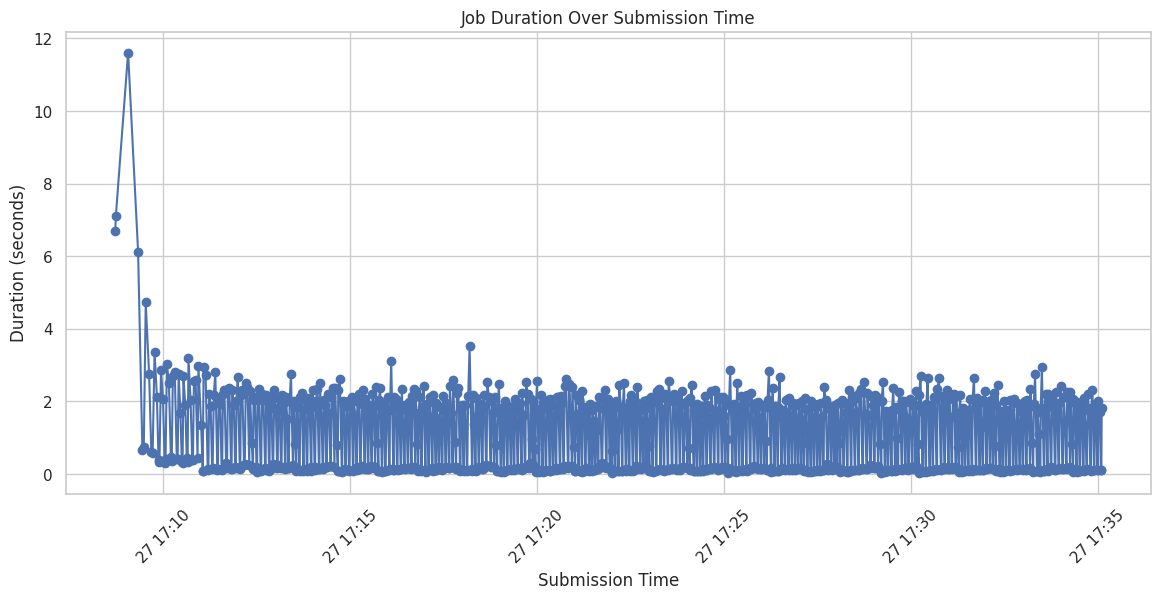

/tmp/ipykernel_25273/2522100623.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_stages['DurationSec'], shade=True, color='purple')


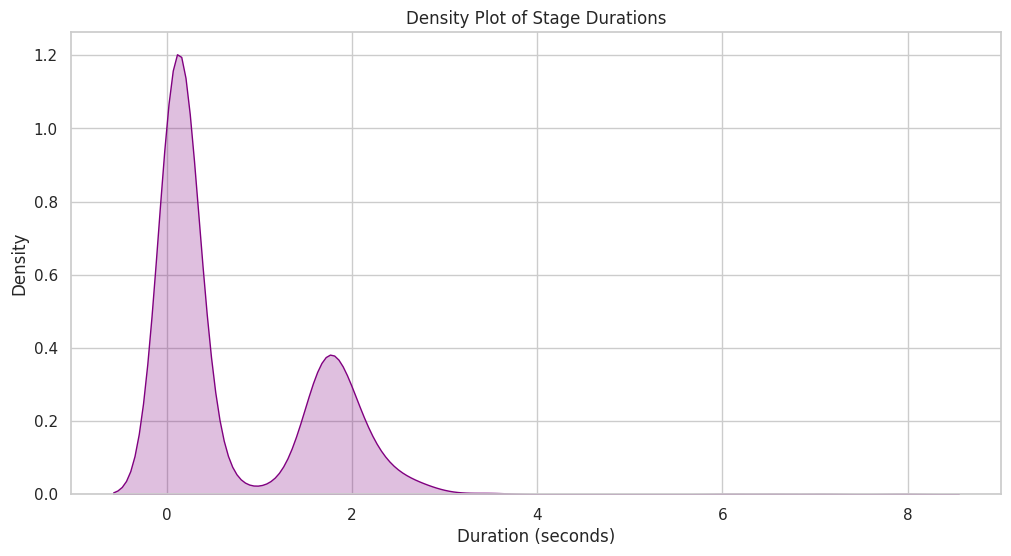

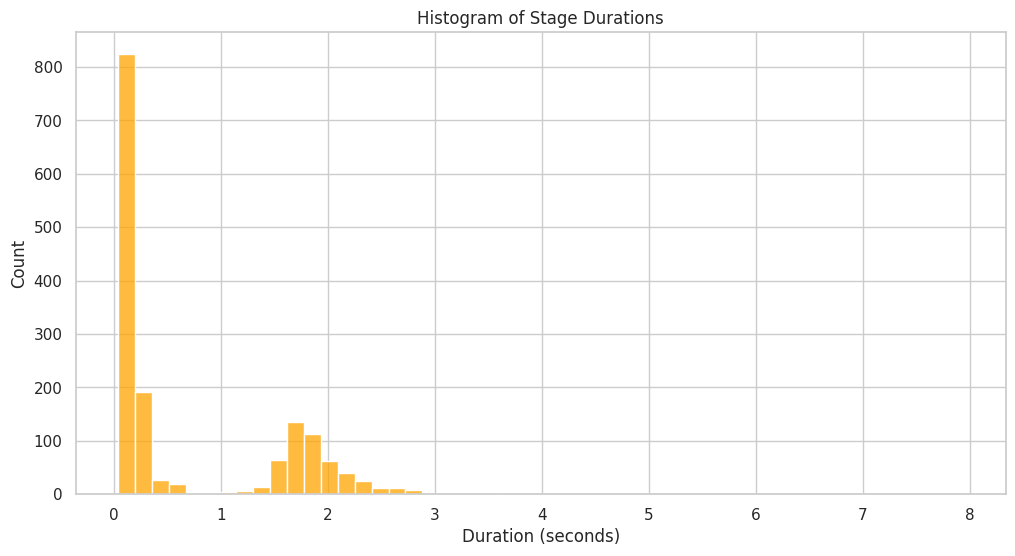

In [4]:
plot_bonus_spark_eventlog(pd.read_parquet("../../data/raw/second_experiment/df_jobs.parquet"), pd.read_parquet("../../data/raw/second_experiment/df_stages.parquet"))
